In [1]:
import tensorflow as tf
import tensorflow.contrib.slim as slim
import numpy as np

### 밴딧

밴딧을 정의하는 구간.

- 4개의 손잡이를 가지는 밴딧
- pullBandit() : 평균값 0의 정규분포로부터 랜덤한 숫자를 생성함
- 밴딧의 수가 작을수록 +의 보상이 돌아올 가능성이 높다.

목적 : 언제나 양의 보상을 가져올 손잡이를 선택하도록 학습.

In [4]:
bandit_arms = [0.2, 0, -0.2, -2]
num_arms = len(bandit_arms)

def pullBandit(bandit) :
    # 랜덤값 추출
    result = np.random.randn(1)
    if result > bandit :
        # 양의 보상 반환
        return 1
    else :
        return -1

### 에이전트

간단한 신경망 구축 부분.

- 각각 밴딧 손잡이에 대한 일련의 값들로 구성
    - 각각의 값 : 밴딧 선택에 의해 반환되는 추정치
- 정책 경사 방법 : 선택된 액션에 대한 값을 반환받은 보상쪽으로 이동    

In [7]:
# 재실행시 리셋 시켜줌
tf.reset_default_graph()

# 네트워크의 피드, 포워드
weights = tf.Variable(tf.ones([num_arms]))
output = tf.nn.softmax(weights)

# 내가 이해안가서 찍어보기
print(weights)
print(output)

'''
<tf.Variable 'Variable:0' shape=(4,) dtype=float32_ref>
Tensor("Softmax:0", shape=(4,), dtype=float32)
'''

<tf.Variable 'Variable:0' shape=(4,) dtype=float32_ref>
Tensor("Softmax:0", shape=(4,), dtype=float32)


In [10]:
reward_holder = tf.placeholder(shape=[1], dtype=tf.float32)
action_holder = tf.placeholder(shape=[1], dtype=tf.int32)
tf.slice
responsible_output = tf.slice(output, action_holder, [1])

'''
tf.slice(input_, begin, size, name=None)
'''

In [11]:
loss = -(tf.log(responsible_output) * reward_holder)
optimizer = tf.train.AdamOptimizer(learning_rate=ning_rate = 1e-3)
update = optimizer.minimize(loss)

### 에이전트 학습

이제 환경내에서 액션을 취해서 에이전ㅌ를 학습하고, 보상을 받게 된다.

보상과 액션을 이용해서, 시간의 경과에 따라 최고의 보상을 받게 될 액션을 보다 "자주" 선택하기 위해, 네트워크를 어떻게 업데이트를 시켜야 하는지 살펴보는 과정.

In [15]:
# agent 학습시킬 전체 에피소드 횟수 설정
total_episodes = 1000
# 밴딧의 손잡이에 대한 보상을 0으로 설정
total_reward = np.zeros(num_arms)

init = tf.global_variables_initializer()

# 텐서플로우 그래프 론칭
with tf.Session() as sess :
    sess.run(init)
    i = 0
    while i < total_episodes :
        
        # 볼츠만 분포에 따라 액션을 선택한다.
        actions = sess.run(output)
        a = np.random.choice(actions, p=actions)
        action = np.argmax(actions == a)
        
        reward = pullBandit(bandit_arms[action])
        
        # 네트워크에 업데이트
        _, resp, ww = sess.run([update, responsible_output, weights],
                              feed_dict = {reward_holder : [reward],
                                          action_holder : [action]})
        # 보상 증가 업데이트
        total_reward[action] += reward
        
        if i % 50 == 0:
            print("Running reward for the " + str(num_arms) + " arms of the bandit: " + str(total_reward))
        i+=1
print("\nThe agent thinks arm " + str(np.argmax(ww) + 1) + " is the most promising....")

 

Running reward for the 4 arms of the bandit: [-1.  0.  0.  0.]
Running reward for the 4 arms of the bandit: [-3.  7.  1. 10.]
Running reward for the 4 arms of the bandit: [-14.  11.   5.  19.]
Running reward for the 4 arms of the bandit: [-19.  10.   9.  31.]
Running reward for the 4 arms of the bandit: [-21.  18.  10.  42.]
Running reward for the 4 arms of the bandit: [-15.  21.  15.  56.]
Running reward for the 4 arms of the bandit: [-15.  23.  16.  77.]
Running reward for the 4 arms of the bandit: [-10.  24.  23.  88.]
Running reward for the 4 arms of the bandit: [-14.  26.  24. 103.]
Running reward for the 4 arms of the bandit: [-14.  26.  26. 121.]
Running reward for the 4 arms of the bandit: [-17.  26.  31. 143.]
Running reward for the 4 arms of the bandit: [-14.  27.  32. 154.]
Running reward for the 4 arms of the bandit: [-17.  26.  34. 168.]
Running reward for the 4 arms of the bandit: [-20.  25.  34. 192.]
Running reward for the 4 arms of the bandit: [-23.  32.  37. 213.]
Run

In [16]:
if np.argmax(ww) == np.argmax(-np.array(bandit_arms)):
    print("...and it was right!")
else:
    print("...and it was wrong!")

...and it was right!


### 추가 학습부분

In [19]:
# agent 학습시킬 전체 에피소드 횟수 설정
total_episodes = 1000
# 밴딧의 손잡이에 대한 보상을 0으로 설정
total_reward = np.zeros(num_arms)

init = tf.global_variables_initializer()

# 텐서플로우 그래프 론칭
with tf.Session() as sess :
    sess.run(init)
    i = 0
    while i < total_episodes :
        
        # 볼츠만 분포에 따라 액션을 선택한다.
        actions = sess.run(output)
        a = np.random.choice(actions, p=actions)
        action = np.argmax(actions == a)
        
        reward = pullBandit(bandit_arms[action])
        
        # 네트워크에 업데이트
        _, resp, ww = sess.run([update, responsible_output, weights],
                              feed_dict = {reward_holder : [reward],
                                          action_holder : [action]})
        # 보상 증가 업데이트
        total_reward[action] += reward
        
        if i % 50 == 0:
            print("Running reward for the " + str(num_arms) + " arms of the bandit: " + str(total_reward))
            # 각 회차마다 뭐가 최선인지를 보고싶어서 print 문을 여기에 넣어봄
            print("\nThe agent thinks arm " + str(np.argmax(ww) + 1) + " is the most promising....")
        i+=1

Running reward for the 4 arms of the bandit: [1. 0. 0. 0.]

The agent thinks arm 1 is the most promising....
Running reward for the 4 arms of the bandit: [-5. -2. -1.  9.]

The agent thinks arm 4 is the most promising....
Running reward for the 4 arms of the bandit: [-2.  3.  2. 28.]

The agent thinks arm 4 is the most promising....
Running reward for the 4 arms of the bandit: [-2. -1.  8. 40.]

The agent thinks arm 4 is the most promising....
Running reward for the 4 arms of the bandit: [-3.  0. -1. 49.]

The agent thinks arm 4 is the most promising....
Running reward for the 4 arms of the bandit: [-3.  1.  7. 64.]

The agent thinks arm 4 is the most promising....
Running reward for the 4 arms of the bandit: [-4. -1.  8. 72.]

The agent thinks arm 4 is the most promising....
Running reward for the 4 arms of the bandit: [-9.  1. 11. 86.]

The agent thinks arm 4 is the most promising....
Running reward for the 4 arms of the bandit: [-16.  -5.  13.  93.]

The agent thinks arm 4 is the mo

## MCPE

In [2]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%pylab inline
import random

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\envs\ywkeras\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['gamma']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [24]:
gamma = 0.6 # discounting rate
# 리워드가 -1 : 목적지까지 최단기간으로 가라
rewardSize = -1
gridSize = 4
# [0,0], [3,3]
terminationStates = [[0,0], [gridSize-1, gridSize-1]]
# 위로 가면 행의 값이 줄어들고, 오른쪽으로 가면 열의 값이 줄어든다.
actions = [[-1, 0], [1, 0], [0, 1], [0, -1]]  # up, down, left, right
numIterations = 10000

# initialization
V = np.zeros((gridSize, gridSize))
returns = {(i, j):list() for i in range(gridSize) for j in range(gridSize)} #dictionary with keys and values 
deltas = {(i, j):list() for i in range(gridSize) for j in range(gridSize)}  #dictionary with keys and values 
states = [[i, j] for i in range(gridSize) for j in range(gridSize)]

In [25]:
# 시간이 없으니 읽어보라하심 ㅎㅎ
# utils
def generateEpisode():
    initState = random.choice(states[1:-1])
    episode = []
    while True:
        if list(initState) in terminationStates:
            return episode
        action = random.choice(actions)
        finalState = np.array(initState)+np.array(action)
        if -1 in list(finalState) or gridSize in list(finalState):
            finalState = initState
        episode.append([list(initState), action, rewardSize, list(finalState)])
        initState = finalState

In [26]:
for it in tqdm(range(numIterations)):  # tqdm : 상태바 출력
    episode = generateEpisode()
    G = 0s
    # episode 안에 있는 값들을 거꾸로 해석하고 index를 붙임
    '''
    뒤집는 이유:
    벨만 방정식에서 보면, 현재시점 t 에서 t+1, t+2의 R값을 계속 더해나가는데
    이 계산을 쉽게 해나가려면 과거시점부터 순차적으로 올라오는게 아니라,
    역순으로 거꾸로 계산을 해야 t+2 나 현시점에서 먼 시점의 값을 계산하기가 용이함.
    '''
    for i, step in enumerate(episode[::-1]):
        # 지금 시점보다 두 step 뒤의 값을 기준점으로 계산
        G = gamma*G + step[2]
        if step[0] not in [x[0] for x in episode[::-1][len(episode)-i:]]:
            idx = (step[0][0], step[0][1])
            returns[idx].append(G)
            newValue = np.average(returns[idx])
            deltas[idx[0], idx[1]].append(np.abs(V[idx[0], idx[1]]-newValue))
            V[idx[0], idx[1]] = newValue

100%|████████████████████████████████████| 10000/10000 [00:32<00:00, 305.22it/s]


In [27]:
print("Value Table\n", V)

Value Table
 [[ 0.         -1.6140536  -2.2106803  -2.38099831]
 [-1.62625404 -2.10256418 -2.27651737 -2.21204538]
 [-2.22209602 -2.28072405 -2.09728261 -1.62047082]
 [-2.38475144 -2.22775279 -1.6388167   0.        ]]


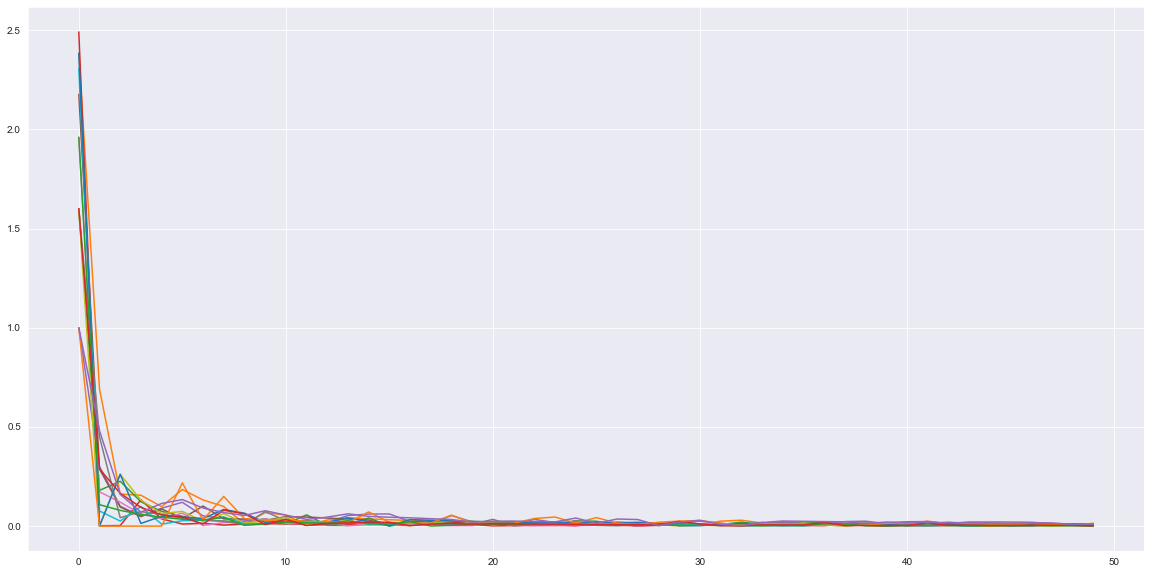

In [28]:
# using gamma = 1
plt.figure(figsize=(20,10))
all_series = [list(x)[:50] for x in deltas.values()]
for series in all_series:
    plt.plot(series)